60점만점에 40점 이상시 통과입니다~

## Q1. 통계분석 (50점)

아래의 df는 타이타닉 데이터셋에서 추출된 표본이다. 적절한 전처리를 한 뒤 통계분석을 수행하시오.

### 신뢰구간 (25점)

Age 변수의 분포를 시각화하고, 분포를 묘사하시오. (10점)

    - 중앙 (3점)
    - 분산 (3점)
    - 모양과 이상치 유무 (4점)
    
    
표본의 평균 나이로 95% 신뢰구간을 구축하시오. (15점)

    - 신뢰구간 선정 (5점)
    - 구간 계산 (5점)
    - 구간 해석 (5점)
    
### 가설검정 (25점)

살아남은 사람들의 평균 나이와 그렇지 못한 사람들의 평균 나이에 차이가 있습니까?

    - 가설 (5점)
    - 검정 선택 후 가정 확인 (10점)
    - 통계량 계산 (5점)
    - 결과 해석 (5점)

주의! 세션에서는 단일표본 t 검정을 했지만, 여기엔 모집단이 두개입니다!


<details>
    <summary>힌트는 <font color="red"><b>여기를 클릭</b></font></summary>
  
  만약 직접 t 통계량을 계산하기 까다롭다면, scipy.stats.ttest_ind_from_stats를 사용해 봅시다.
    
  scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')
</details>

## A0 . 전처리

### A0-1 . Null Values Imputation or Drop

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YBIGTA/교육세션 7일차/train.csv')
# sampling
df = df.sample(75, random_state=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 862 to 772
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  75 non-null     int64  
 1   Survived     75 non-null     int64  
 2   Pclass       75 non-null     int64  
 3   Name         75 non-null     object 
 4   Sex          75 non-null     object 
 5   Age          64 non-null     float64
 6   SibSp        75 non-null     int64  
 7   Parch        75 non-null     int64  
 8   Ticket       75 non-null     object 
 9   Fare         75 non-null     float64
 10  Cabin        18 non-null     object 
 11  Embarked     75 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.6+ KB


In [3]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            11
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          57
Embarked        0
dtype: int64

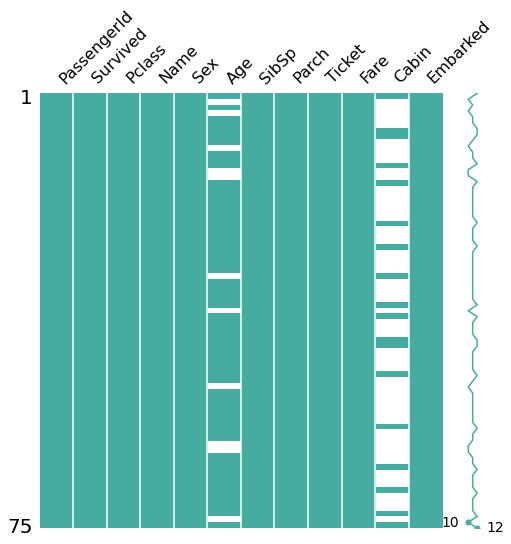

In [4]:
import missingno as msno
msno.matrix(df=df, figsize=(8, 8), color=(70/255, 172/255, 161/255))

Age, Cabin 변수에서 결측치 확인
- Age의 경우 float64
- Cabin의 경우 Object

In [5]:
# unique values 확인
print(
    f"""
Unique Values
Age : {df.Age.nunique()}
Cabin : {df.Cabin.nunique()}

Unique Values per Total NonNull Values
Age   : {(df.Age.nunique())/df.Age.notnull().sum()*100:.2f}%
Cabin  : {(df.Cabin.nunique())/df.Cabin.notnull().sum()*100:.2f}%"""
)


Unique Values
Age : 37
Cabin : 18

Unique Values per Total NonNull Values
Age   : 57.81%
Cabin  : 100.00%


In [6]:
# titanic_data의 shape을 확인하고, Age변수와 Cabin 변수의 null값 비율을 확인해보기
print(df.shape)
print(
    f"""Age의 null percentage : {(df.Age.isnull().sum())/df.shape[0]*100:.2f}%
Cabin의 null percentage : {(df.Cabin.isnull().sum())/df.shape[0]*100:.2f}%"""
)

(75, 12)
Age의 null percentage : 14.67%
Cabin의 null percentage : 76.00%


In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,75.000000,75.000000,75.000000,64.000000,75.000000,75.000000,75.000000
mean,439.053333,0.426667,2.266667,28.234375,0.600000,0.520000,34.533947
std,291.529327,0.497924,0.827457,12.601011,1.325427,1.069984,66.616450
min,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,7.050000
25%,189.000000,0.000000,2.000000,21.000000,0.000000,0.000000,9.981250
50%,386.000000,0.000000,3.000000,26.500000,0.000000,0.000000,15.500000
75%,727.500000,1.000000,3.000000,36.000000,1.000000,0.500000,31.331250
max,883.000000,1.000000,3.000000,61.000000,8.000000,5.000000,512.329200


종합적으로 unique value의 개수와 null값이 Feature 전체에서 차지하는 비율을 고려해보았을 때 Cabin Feature의 경우 결측치가 너무 많고, Unique한 Value가 차지하는 비율도 굉장히 높은 편이라 Imputation을 하더라도 잘못된 Imputation이 이루어질 가능성이 있다. 따라서 Column 삭제를 고려하였다.

나머지 변수인 Age의 경우 결측치 비율이 높은 편은 아니므로 평균값으로 결측치 대체를 고려하였다.

In [9]:
# Cabin Feature 제거
if 'Cabin' in list(df.columns):
  df.drop(['Cabin'], axis=1, inplace = True)
# Age는 평균으로 Impute
df.Age.fillna(df.Age.mean(), inplace=True)

print(f'df.isnull().sum() : {df.isnull().sum()}')

# display
display(df.head())

df.isnull().sum() : PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.000000,0,0,17466,25.9292,S
223,224,0,3,"Nenkoff, Mr. Christo",male,28.234375,0,0,349234,7.8958,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.000000,0,0,SO/C 14885,10.5000,S
680,681,0,3,"Peters, Miss. Katie",female,28.234375,0,0,330935,8.1375,Q
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.000000,0,2,F.C.C. 13529,26.2500,S


모든 결측치를 전처리 완료했다. 결측치 외에도 값의 분포가 너무 치우친 경우나 scale이 너무 큰 경우 이를 적정 범위로 조절해주는 Scaling작업을 진행해볼 수 있다. 하지만 Age Feature에만 관심을 갖는다면 더 이상 추가로 전처리를 진행할 부분은 없다.

### A0-1 . 각 Feature들의 분포 살펴보기

In [10]:
# Name, Sex, Ticket, Embarked의 경우 숫자형 데이터가 아님. (Cabin은 Feature Drop으로 고려 X)
# 나머지 숫자형 변수들의 통계량을 확인
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,439.053333,0.426667,2.266667,28.234375,0.600000,0.520000,34.533947
std,291.529327,0.497924,0.827457,11.626789,1.325427,1.069984,66.616450
min,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,7.050000
25%,189.000000,0.000000,2.000000,22.000000,0.000000,0.000000,9.981250
50%,386.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.500000
75%,727.500000,1.000000,3.000000,35.000000,1.000000,0.500000,31.331250
max,883.000000,1.000000,3.000000,61.000000,8.000000,5.000000,512.329200


위 변수들 중 PassengerId는 고유값으로 의미가 없는 값이므로 관찰에서 제외하자.

예측할 변수인 Survived도 제외하면 Pcalss, Age, SibSp, Parch, Fare의
다섯가지 Feature에 대한 분포만 관찰해보면 된다.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

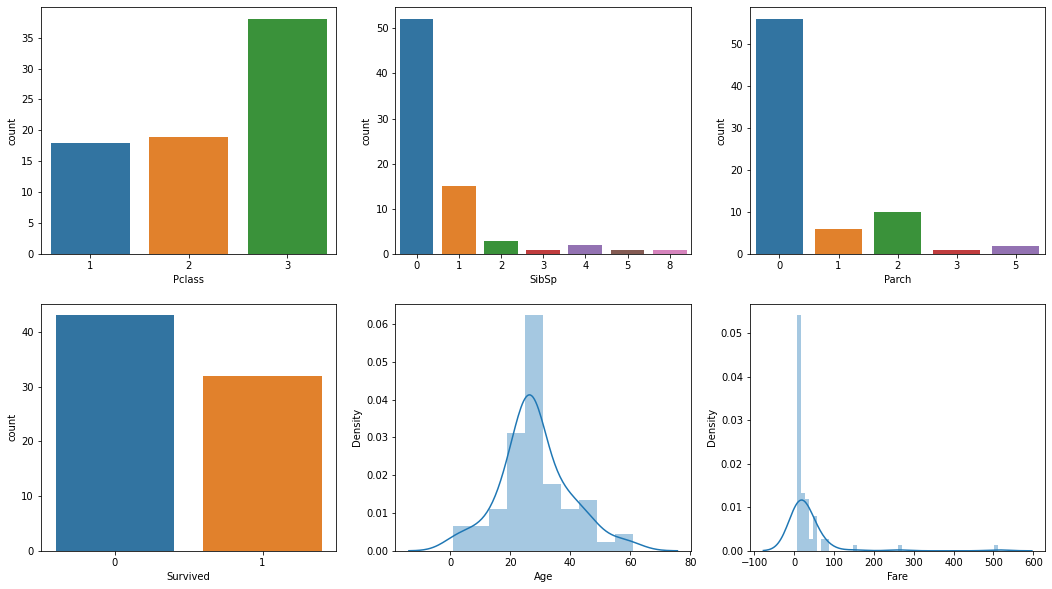

In [12]:
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

col_of_interest = ['Pclass', 'SibSp', 'Parch', 'Survived', 'Age', 'Fare']

for i in range(6):
    # int64 or target
    if i < 4:
      sns.countplot(df[col_of_interest[i]], ax = ax[i//3, i%3])
    # float64
    else:
      sns.distplot(df[col_of_interest[i]], ax = ax[i//3, i%3])

## A1-1 . 신뢰구간(25점)

### Age 변수의 분포를 시각화하고, 분포를 묘사하시오. (10점)

    - 중앙 (3점)
    - 분산 (3점)
    - 모양과 이상치 유무 (4점)

위에서 Age 변수의 분포를 distplot을 이용하여 시각화 한 이미지를 참고하여 작성하겠다.

In [13]:
df.Age.describe()

count    75.000000
mean     28.234375
std      11.626789
min       1.000000
25%      22.000000
50%      28.000000
75%      35.000000
max      61.000000
Name: Age, dtype: float64

분포의 중앙은 50% 4분위수의 값에 해당하는 28.0 이다.
해당 샘플에서 계산된 표본평균의 경우 28.234375로 계산되었다.
분산 정도를 나타내는 표본표준편차의 경우 11.002015로 계산되었다.

분포의 모양은 종 모양을 하고 있고 표본의 데이터의 크기가 30보다 크기 때문에 큰수의 법칙에 의해 정규분포에 근사한 분포를 띈다고 할 수 있다. 이상치의 경우 사전에 전처리를 통해 결측치를 제외한 평균값으로 Imputation을 진행하였다.

### 표본의 평균 나이로 95% 신뢰구간을 구축하시오. (15점)

    - 신뢰구간 선정 (5점)
    - 구간 계산 (5점)
    - 구간 해석 (5점)

In [14]:
# scipy.stats import
from scipy import stats
import numpy as np

#### 신뢰구간 선정
 추정하고자 하는 모평균이 내가 만든 CI내에 있을 확률이 95%가 되어야 하므로,
 df['Age']의 확률밀도함수 상에서 좌측 2.5%와 우측 2.5%를 제외한 나머지 구간을 Cover하는 Confidence Interval을 만들어야 한다.

분포의 중심이 되는 표본의 평균을 기준으로 

$ criticalvalue * standarderror $ 
만큼의 간격으로 좌 우로 CI가 설정된다.

In [15]:
center = df['Age'].mean()
dof = len(df) - 1
print(center)
critic_value = stats.t.ppf(0.975, dof, 0, 1)
print(f"critic_value : {critic_value}")

28.234375
critic_value : 1.99254349484682


In [16]:
age_std_error = df['Age'].std()/np.sqrt(75)
print(f"age_std_error : {age_std_error}")

age_std_error : 1.3425459459985407


#### 구간 계산

In [17]:
age_CI = (center - critic_value * age_std_error, center + critic_value * age_std_error)

In [18]:
age_CI

(25.559293808767638, 30.909456191232362)

#### 구간 해석

전체 데이터셋에서 75개를 임의 비복원추출한 표본인 df중 'Age'에 해당하는 변수의 CI 계산 결과 age의 모평균 $m_a$는 

$(25.559293808767638, 30.909456191232362)$

에 약 95%의 확률로 존재하게 된다.

## A1-2 . 가설검정(25점)

### 가설검정 (25점)

살아남은 사람들의 평균 나이와 그렇지 못한 사람들의 평균 나이에 차이가 있습니까?

    - 가설 (5점)
    - 검정 선택 후 가정 확인 (10점)
    - 통계량 계산 (5점)
    - 결과 해석 (5점)

주의! 세션에서는 단일표본 t 검정을 했지만, 여기엔 모집단이 두개입니다!

#### 가설
생존한 사람들의 평균 나이를 $m_a$, 그렇지 못한 사람들의 평균 나이를 $m_n$라고 하면,

$ H_0: m_a - m_n = 0$

$ H_1: not H_0$

#### 검정 선택 후 가정 확인

가장 우선적으로 두 집단의 표준편차에 대한 정보 역시 알려져 있지 않기 때문에, $σ_a, σ_n$를 사용하는 z검정 대신 표준오차를 사용하는 t검정이 이루어져야 한다.


In [19]:
# alive인 집단
df_a = df.loc[df.Survived == 1]
df_a = df_a['Age']
display(df_a.shape)

# not alive인 집단
df_n = df.loc[df.Survived == 0]
df_n = df_n['Age']
display(df_n.shape)

(32,)

(43,)

두 집단의 경우 모두 Random한 추출에 의해 추출된 표본으로부터 나온 데이터이고(Randomness)

두 집단 모두 표본의 크기가 30보다 크기 때문에 큰수의 법칙에 의해 근사적으로 정규분포를 따르게 된다.(Normality)

또한 두 집단의 경우 Survived 변수를 기준으로 나누어진 표본이므로 서로 독립이라고 할 수 있다.

#### 통계량 계산
scipy.stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2, equal_var=True, alternative='two-sided')

In [20]:
stats.ttest_ind_from_stats(df_a.mean(), df_a.std(), df_a.shape[0], df_n.mean(), df_n.std(), df_n.shape[0], equal_var=True, alternative='two-sided')

Ttest_indResult(statistic=-0.9138710555393881, pvalue=0.3637931994699718)

#### 결과 해석
두 집단의 평균이 동일하다고 가정하고 계산한 t통계량이 기각역에 포함될 확률인 pvalue값이 초기에 설정한 유의수준 5%(0.05)보다 큰 값이 등장하였기 때문에 귀무가설 $H_0$를 기각할 충분한 근거는 존재하지 않는다. 따라서 두 집단의 나이 평균은 비슷한 수준이라고 할 수 있다.

## Q2. 회귀분석

다음 데이터셋에 대해 두가지 방법으로 회귀식을 도출하시오

In [21]:
reviews = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/YBIGTA/교육세션 7일차/reviews.xlsx')
x = reviews['kakao'].values
y = reviews['naver'].values

### Ordinary Least Squares (10점)

다음 수식을 numpy를 사용하여 재현해보시오

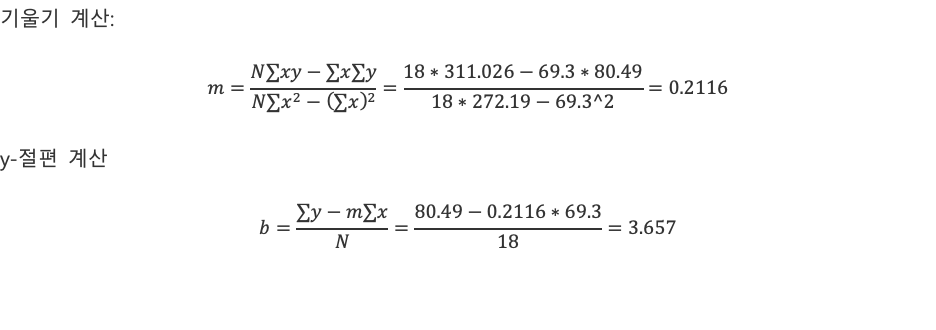


In [22]:
print(x.shape)
print(y.shape)

(18,)
(18,)


In [23]:
display(x)
display(y)

array([4.1, 4. , 3.9, 4.4, 4.3, 4.3, 3.9, 4.2, 4.2, 3.3, 3.5, 3.7, 4.3,
       2. , 3.5, 3.8, 3.7, 4.2])

array([4.46, 4.48, 4.53, 4.55, 4.49, 4.81, 4.53, 4.49, 4.5 , 4.3 , 4.48,
       4.33, 4.47, 4.1 , 4.51, 4.34, 4.35, 4.77])

In [24]:
type(x)

numpy.ndarray

In [25]:
# since x.shape[0] = y.shape[0]

class calcOLS():
  def __init__(self, x, y):
    self.x = x
    self.y = y
    self.N = x.shape[0] if x.shape[0] == y.shape[0] else None
    if self.N == None:
        raise Exception (f"x와 y의 shape이 다릅니다.")
    self.sigmax = x.sum()
    self.sigmay = y.sum()
  
  def get_size(self):
    return self.N

  def get_sigma_xy(self):
    return sum(self.x * self.y)

  def get_x_squared_sigma(self):
    return sum(self.x * self.x)

  def get_grad(self):
    return round(
    (ols.get_size() * ols.get_sigma_xy() - self.sigmax * self.sigmay) / (ols.get_size() * ols.get_x_squared_sigma() - (self.sigmax)**2),
    4)
  
  def get_const(self):
    return round(
    (self.sigmay - ols.get_grad() * self.sigmax) / ols.get_size(),
    4)

In [26]:
ols = calcOLS(x, y)
print(
    f"""m = {ols.get_grad()}
b = {ols.get_const()}
""")

m = 0.2116
b = 3.657



In [27]:
# Exception 작동 확인
a = np.ndarray([1, 2, 3])
b = np.ndarray([2, 3])
ols2 = calcOLS(a,b)

Exception: ignored

### Gradient Descent (Optional, 10점)

Why gradient descent? 물론 기울기와 y절편을 한방에 찾아내는 공식이 있지만, 데이터가 많아질수록 너무 복잡해지는 (O(n^3)) 문제점이 있습니다. 이를 조금 완화시키고자 경사하강법을 사용합니다.

[Intuition](https://www.youtube.com/watch?v=sDv4f4s2SB8&ab_channel=StatQuestwithJoshStarmer)

아래의 수식을 넘파이로 구현해 봅시다.

사진출처: https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

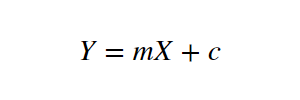

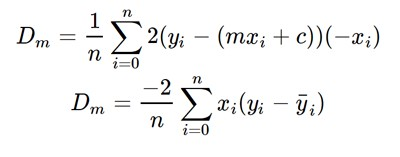

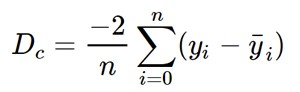

그 후, 적절한 iterations와 learning rate 를 찾아 위의 결과를 재현해 봅시다!

In [28]:
m = 0
c = 0
n = len(x)

# 얼마나 반복해야 할까요?
iterations = 50000

# 한번에 얼마나 update 해야 할까요?
learning_rate = 0.01 # 0.01
    
for i in range(iterations):
    
    # Calculate predictions
    yhat = m * x + c

    # Calculate mean squares
    mean_squares = sum((yhat-y)**2)
    
    if i % 100 == 0:
        print(f'Iteration {i}: {mean_squares:.4f}')
        print(f'y = {m:.3f}x + {c:.3f}')
        
    # Calculate gradient
    dm = -2/n * sum(x * (y-yhat))
    dc = -2/n * sum(y - yhat)

    # Update parameters
    m = m - learning_rate * dm
    c = c - learning_rate * dc

Iteration 0: 360.3639
y = 0.000x + 0.000
Iteration 100: 3.9827
y = 1.043x + 0.397
Iteration 200: 3.7116
y = 1.012x + 0.516
Iteration 300: 3.4599
y = 0.983x + 0.631
Iteration 400: 3.2263
y = 0.955x + 0.741
Iteration 500: 3.0094
y = 0.928x + 0.847
Iteration 600: 2.8081
y = 0.902x + 0.950
Iteration 700: 2.6211
y = 0.876x + 1.049
Iteration 800: 2.4476
y = 0.852x + 1.144
Iteration 900: 2.2864
y = 0.829x + 1.236
Iteration 1000: 2.1369
y = 0.806x + 1.324
Iteration 1100: 1.9980
y = 0.785x + 1.409
Iteration 1200: 1.8691
y = 0.764x + 1.491
Iteration 1300: 1.7494
y = 0.744x + 1.570
Iteration 1400: 1.6383
y = 0.724x + 1.646
Iteration 1500: 1.5352
y = 0.705x + 1.720
Iteration 1600: 1.4394
y = 0.687x + 1.790
Iteration 1700: 1.3505
y = 0.670x + 1.858
Iteration 1800: 1.2680
y = 0.653x + 1.924
Iteration 1900: 1.1913
y = 0.637x + 1.987
Iteration 2000: 1.1202
y = 0.622x + 2.048
Iteration 2100: 1.0542
y = 0.607x + 2.107
Iteration 2200: 0.9929
y = 0.592x + 2.163
Iteration 2300: 0.9360
y = 0.578x + 2.218
It

Gradient Descent 연산 역시 OLS 연산과 유사한 기울기와 절편 값이 얻어짐을 확인할 수 있다.